<a href="https://colab.research.google.com/github/lailyafiah/Artificial-Intelligence-Expert/blob/main/05SarsaLFrozenLakeMedium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

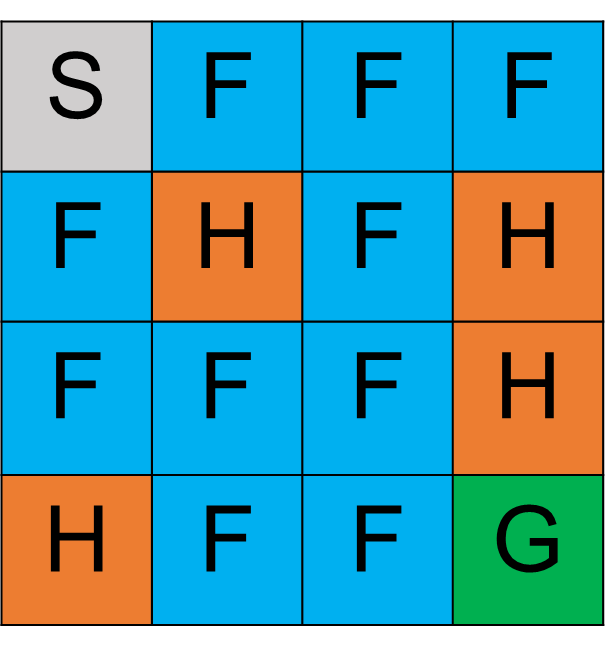

In [ ]:
import gym
import numpy as np
import time, pickle, os

In [ ]:
# Epsilon Greedy
def choose_action(state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

In [ ]:
def learn(state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + lr_rate * (target - predict)

In [ ]:
# https://medium.com/swlh/introduction-to-reinforcement-learning-coding-sarsa-part-4-2d64d6e37617
# https://medium.com/swlh/introduction-to-reinforcement-learning-coding-q-learning-part-3-9778366a41c0

env = gym.make('FrozenLake-v0')

epsilon = 0.9
total_episodes = 10000
max_steps = 100
min_epsilon = 0.01
max_epsilon = 0.9
decay_rate = 0.01

lr_rate = 0.81
gamma = 0.96
	wins = 0

Q = np.zeros((env.observation_space.n, env.action_space.n))

# Start
rewards=0

for episode in range(total_episodes):
	t = 0

	state = env.reset()
	action = choose_action(state)
    
	while t < max_steps:
		# env.render()
		state2, reward, done, info = env.step(action)
		action2 = choose_action(state2)
	
		learn(state, state2, reward, action, action2)
		state = state2
		action = action2

		t += 1
		rewards+=1

		if reward == 1.0:
			wins += 1

		if done:
			break
	print(t)
		
		# epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 
	  # os.system('clear')
		# time.sleep(0.1)

print ("Averege Reward for Total Episode : ", rewards/total_episodes, "\n") 
print("Total win for all episode :", wins)
print(Q)

Streaming output truncated to the last 5000 lines.
4
2
20
5
10
10
7
7
4
8
16
2
12
9
4
6
7
6
2
2
5
2
2
6
16
13
18
3
8
8
8
17
3
2
12
11
9
5
4
26
4
15
11
10
4
6
4
6
6
13
9
8
4
3
15
3
6
11
3
20
10
8
4
5
2
6
13
3
23
16
4
8
3
3
5
4
15
14
7
7
2
11
8
5
2
8
5
2
5
55
6
12
8
20
4
12
13
5
14
2
5
9
2
7
10
10
8
6
3
11
4
13
4
7
2
7
4
3
22
3
4
5
12
6
2
5
7
5
10
3
3
3
3
5
6
7
3
10
11
10
12
11
10
2
10
8
3
9
2
3
17
10
7
5
4
9
3
2
6
17
2
9
4
3
14
8
6
12
7
6
6
8
6
3
3
4
7
8
5
3
3
6
4
5
18
8
5
19
9
8
14
5
4
7
8
6
12
3
12
9
5
16
2
30
13
17
6
3
8
2
9
5
5
5
7
10
6
2
8
3
3
15
14
8
9
7
11
4
27
3
5
8
6
4
4
20
4
4
2
20
5
11
10
2
9
3
8
5
5
14
6
5
2
8
7
3
3
10
10
5
15
12
6
20
17
4
2
6
8
6
11
6
3
7
2
2
5
6
4
15
8
4
2
8
4
10
21
4
12
2
5
4
7
14
8
9
31
8
11
3
3
12
13
12
13
13
9
5
2
7
2
4
10
2
2
2
9
36
9
13
13
7
10
8
14
4
4
4
14
10
14
8
6
2
14
2
3
3
3
2
2
6
6
2
2
7
12
12
4
2
7
10
24
6
15
10
3
11
9
9
7
10
2
2
3
2
7
13
2
7
8
8
12
3
3
12
15
15
2
5
9
6
4
3
8
19
2
6
8
6
10
3
2
4
22
5
7
15
2
3
7
4
6
6
8
14
13
5
7
5
4
29
10
10


In [ ]:
state2, reward, done, info = env.step(1)
print(state2, reward, done, info)

5 0 True {'prob': 1.0}


In [ ]:
def test_policy(policy, env, episodes):
      wins = 0
      total_reward = 0
      for i in range(episodes):
            w = run_game(env, policy, display=False)[-1][-1]
            if w == 1:
                  wins += 1
                  total_reward += 1
      return wins, total_reward

In [ ]:
def run_game(env, policy, display=True):
     env.reset()
     episode = []
     finished = False

     while not finished:
          s = env.env.s
          if display:
               clear_output(True)
               env.render()
               sleep(1)

          timestep = []
          timestep.append(s)
          n = random.uniform(0, sum(policy[s].values()))
          top_range = 0
          for prob in policy[s].items():
                 top_range += prob[1]
                 if n < top_range:
                       action = prob[0]
                       break 
          state, reward, finished, info = env.step(action)
          timestep.append(action)
          timestep.append(reward)

          episode.append(timestep)

     if display:
          clear_output(True)
          env.render()
          sleep(1)
     return episode